In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import joblib

In [4]:
# 1.a Load the dataset and perform exploratory data analysis (EDA)
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')

In [5]:
# 1.b Examine the features, their types, and summary statistics
print(train_data.info())
print(train_data.describe())
print(train_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

C:\Users\KRISHNA TEJA\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\KRISHNA TEJA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\KRISHNA TEJA\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


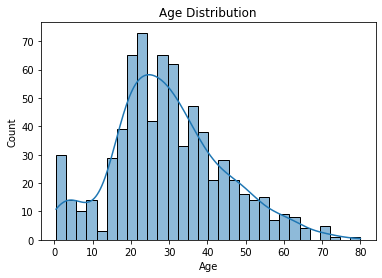

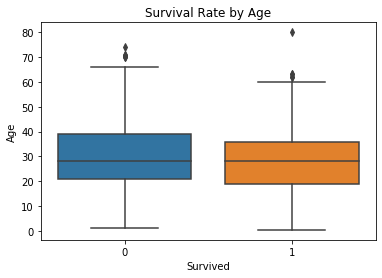

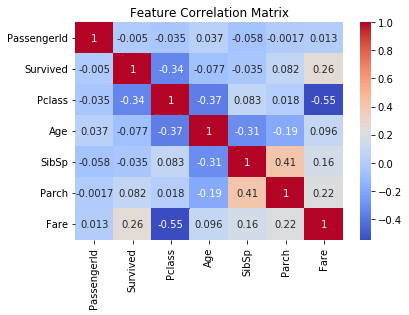

In [6]:
# 1.c Visualizations: Histograms, Box Plots, and Correlation Matrix
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title("Survival Rate by Age")
plt.show()

sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [7]:
# 2.a Handle missing values (e.g., imputation)
imputer = SimpleImputer(strategy='median')
train_data[['Age', 'Fare']] = imputer.fit_transform(train_data[['Age', 'Fare']])
test_data[['Age', 'Fare']] = imputer.transform(test_data[['Age', 'Fare']])

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

In [8]:
# 2.b Encode categorical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = label_encoder.transform(test_data['Embarked'])

In [9]:
# Drop unnecessary columns
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [10]:
# Define feature matrix X and target variable y
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [11]:
# Split the dataset into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data = scaler.transform(test_data)

In [13]:
# 3.a Build Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [14]:
# 4.a Model Evaluation
y_pred = model.predict(X_val)
y_pred_prob = model.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8045
Precision: 0.7826
Recall: 0.7297
F1 Score: 0.7552
ROC AUC Score: 0.8819


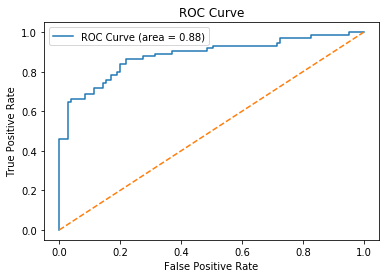

In [15]:
# Visualize the ROC curve
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
# 5.a Interpret Coefficients
coefficients = pd.DataFrame(model.coef_.flatten(), index=X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

          Coefficient
Fare         0.126362
Parch       -0.098565
Embarked    -0.170937
SibSp       -0.349105
Age         -0.395303
Pclass      -0.781927
Sex         -1.278705


In [17]:
# Save the model and scaler using joblib
joblib.dump(model, "logistic_regression_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Difference Between Precision and Recall

Precision and recall are both important in evaluating a classification model, especially for imbalanced datasets. Precision measures how many of the predicted positive cases were actually correct (out of all predicted positives). It answers the question: "When the model says 'yes,' how often is it right?" Recall, on the other hand, measures how many of the actual positive cases were correctly identified (out of all actual positives). It answers the question: "Did the model find all the important cases?" Precision is crucial when false positives are costly (e.g., spam detection), while recall is more important when missing a positive case is dangerous (e.g., diagnosing a serious disease).

# What is Cross-Validation and Why is It Important?

Cross-validation is a technique used to check how well a machine learning model performs on different subsets of data. Instead of training the model on one part and testing on another, cross-validation splits the dataset multiple times, trains the model on some parts, and tests it on the remaining parts. This helps ensure that the model is not just memorizing the data but can also perform well on unseen data. In binary classification, cross-validation is important because it helps avoid overfitting and ensures that the model generalizes well, especially when there is an imbalance between the two classes (e.g., fraud detection where fraudulent cases are rare).